In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [363]:
# Importar Data
df = pd.read_csv('F:\Python\Proyecto-Certificado-AdDFCC\Proyectos-Certificado-Analisis-de-Datos-FreeCodeCamp\Visualizador_de_datos_médicos\medical_examination.csv')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [364]:
# Agregar columna sobrepeso
calc_overweight = (df['weight']) / ((df['height']/100) ** 2)
df['overweight'] = calc_overweight

In [365]:
def overweight(row):
    if (row['overweight'] / 25) > 1:
        val = 1
    else:
        val = 0
    return val

df['overweight'] = df.apply(overweight, axis=1)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [366]:
# Normalizar los datos haciendo que 0 sea siempre bueno y 1 sea siempre malo. Si el valor de 'cholesterol' o 'gluc' es 1, el valor es 0. Si el valor es mayor a 1, el valor es 1.
def normalize(col):
    df.loc[df[col] == 1, col] = 0
    df.loc[df[col] > 1, col] = 1

normalize('cholesterol')
normalize('gluc')


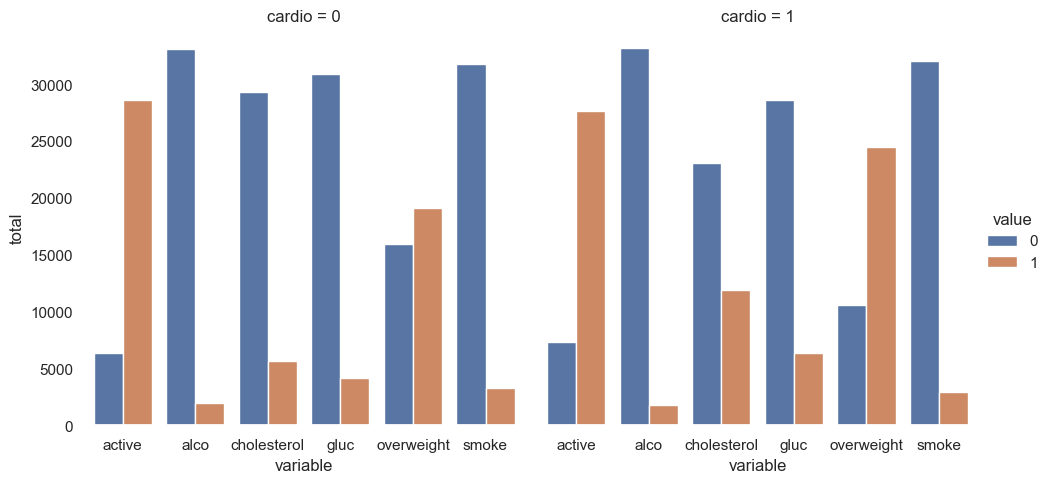

In [367]:
# Dibujar Plot categorico

# Crear un DataFrame usando `pd.melt` para los valores 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
def cat_plot():
    df_cat = df.melt(id_vars=["cardio"], value_vars=["active","alco","cholesterol","gluc","overweight","smoke"])
    df_cat = df_cat.groupby(["cardio", "variable", "value"])
    df_cat = df_cat.size()
    df_cat = df_cat.to_frame("total").reset_index()
    fig = sns.catplot(x="variable",y="total",data=df_cat, hue="value", kind="bar", col="cardio")
    fig.savefig('catplot.png')
    return fig

cat_plot()

In [368]:
df_heat = df[(df['ap_lo'] <= df['ap_hi'])]
df_heat = df[df['height'] >= df['height'].quantile(0.025)]
df_heat = df[df['height'] <= df['height'].quantile(0.975)]
df_heat = df[df['weight'] >= df['weight'].quantile(0.025)]
df_heat = df[df['weight'] <= df['weight'].quantile(0.975)]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [369]:
corr = df_heat.corr()

In [370]:
mask = np.triu(np.ones_like(corr, dtype=bool))

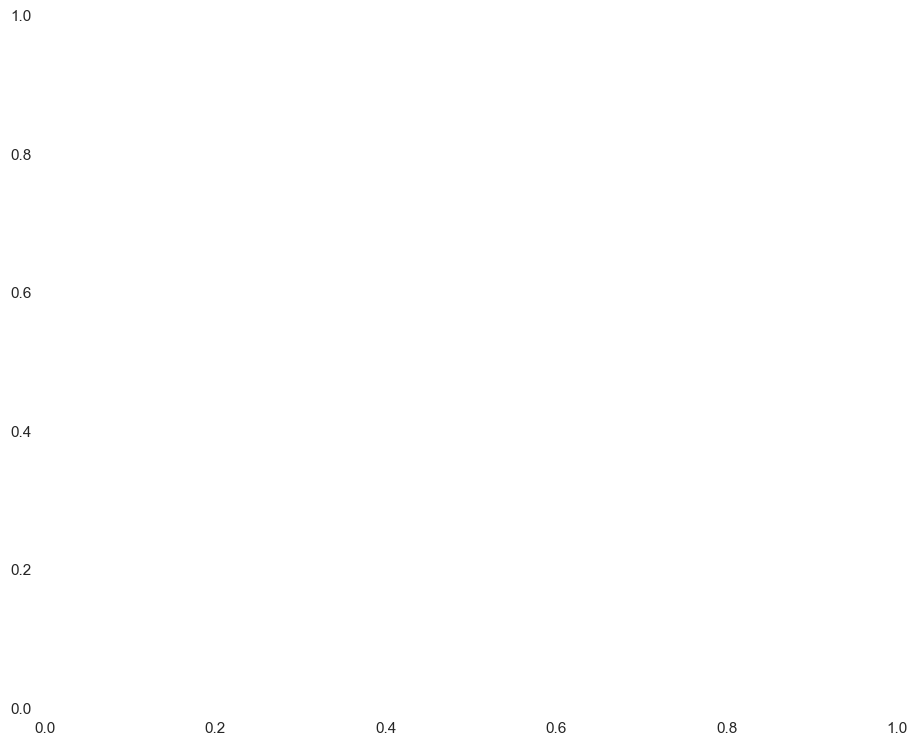

In [372]:
fig, ax = plt.subplots(figsize=(11, 9))

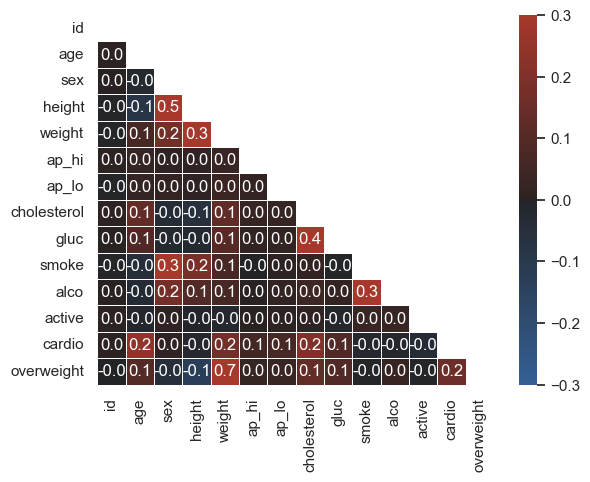

In [373]:
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="dark", as_cmap=True)
heat = sns.heatmap(corr, mask=mask, linewidths=.5, annot=True, cmap=cmap, vmin=-0.3, vmax=0.3, fmt='.1f')
fig = heat.get_figure()